# Create the graph from the following link: 

https://www.nytimes.com/2023/07/26/learning/over-75-new-york-times-graphs-for-students-to-analyze.html

https://static01.nyt.com/images/2023/04/24/learning/AverageGameDurationLN/AverageGameDurationLN-superJumbo.png?quality=75&auto=webp&disable=upscale!%5Bimage.png%5D(attachment:image.png)![image.png](attachment:image.png)

Cargamos nuestro dataset llamado Average_time e importamos las librerías necesarias

Url del dataset https://www.baseball-reference.com/leagues/majors/misc.shtml#teams_standard_misc

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('Average_time.csv')


#La convertimos a fecha para poder manipular mejor los datos
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M') 


Creamos el gráfico de series de tiempo con Matplotlib

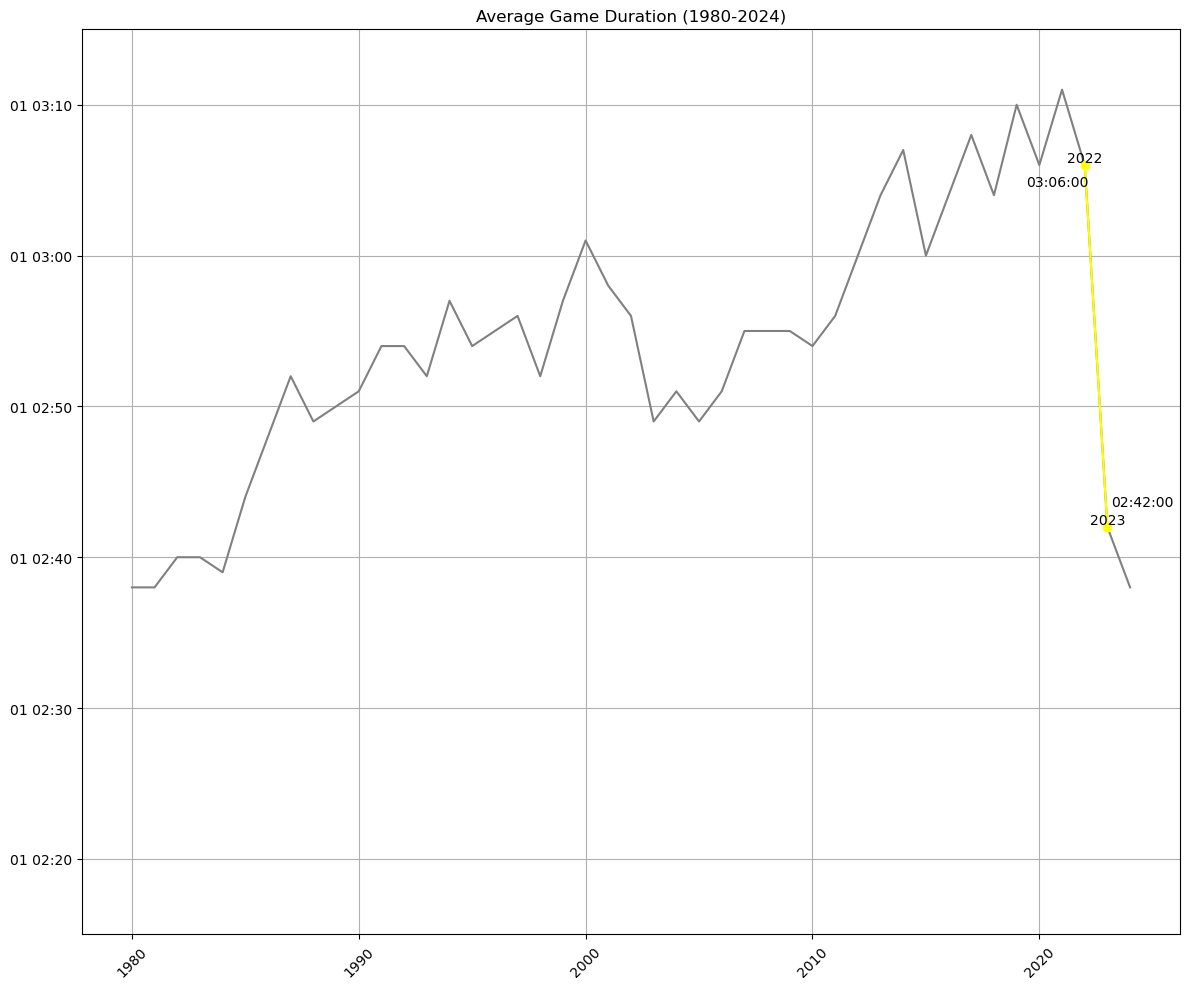

In [2]:
plt.figure(figsize=(12, 10))
plt.plot(df['Year'], df['Time'], color = 'grey')

# Cambiar el color para la línea entre 2022 y 2023
plt.plot(df['Year'][1:3], df['Time'][1:3], marker='o', color='yellow')
plt.title('Average Game Duration (1980-2024)')
plt.grid(True)
plt.xticks(df['Year'][4::10], rotation=45) #Va de 10 en 10 el eje x empezando por 1980
plt.tight_layout()

# Agregar etiquetas para los puntos de interés
plt.text(2022, df['Time'][2], '2022', ha='center', va='bottom')
plt.text(2023, df['Time'][1], '2023', ha='center', va='bottom')

# Anotar la duración promedio por partido en 2022 y 2023
plt.annotate(df['Time'][2].strftime('%H:%M:%S'), (2022, df['Time'][2]), textcoords="offset points", xytext=(-20,-15), ha='center')
plt.annotate(df['Time'][1].strftime('%H:%M:%S'), (2023, df['Time'][1]), textcoords="offset points", xytext=(25,15), ha='center')

# Establecer el límite inferior del eje Y a las 02:15 para homologar con la imagen
plt.ylim(pd.Timestamp('1900-01-01 02:15:00'), pd.Timestamp('1900-01-01 03:15:00'))

plt.show()

# 3. Perform an exploratory analysis in Python on the dataset "Retail Sales".

Importamos las librerías necesarias y cargamos nuestro nuevo dataset

In [3]:
import numpy as np
from scipy.stats import chi2_contingency
import ast 
import seaborn as sns

df = pd.read_csv('Retail_Data.csv')

Checamos los tipos de variables que tenemos y la información de las variables y se puede observar lo siguiente:

    1. Tenemos 13 variables (ID, Fecha...) referentes a un total de 30000 transacciones
    2. Las transacciones van del 1 de enero de 2020 al 9 de septiembre de 2023
    3. No hay una congruencia entre los productos y el total de items
    4. Los productos vienen en una lista por lo que se tendrá que explotar para su ánalisis

In [4]:
print(df.info())
print(df.describe())


#Notamos un valor atípico y checamos la fila a ver a que se debe:
row_150000 = df[df['Total_Cost'] == 150000]

# Verificar la fila obtenida
print(row_150000) #['Ketchup', 'Razors', 'Lawn Mower'] alguno de estos productos es 
#carisímo

# Eliminar la fila especificada
df = df.drop(9)

# Reindexar el DataFrame resultante para que los índices sean secuenciales
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     29999 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          20009 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB
None
       Transaction_ID  Total_Items     Total_Cost
count    3.000000e+04  30000.00000   30000.00

Existe un valor atípico o extremo en costo total con un valor de 150,00 cuando más del 75 por ciento de los productos no superan los 100.

El Costo total promedio se encuentra en 57.57. 

La desviación estándar del costo total se encuentra en 866.21


## Correlación entre variables númericas

Matriz de Correlación:
             Total_Items  Total_Cost
Total_Items     1.000000    0.001059
Total_Cost      0.001059    1.000000


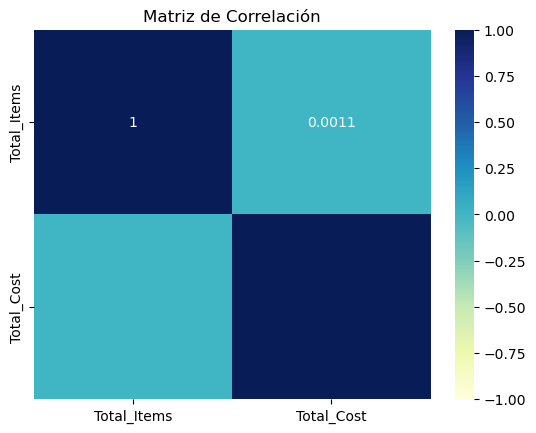

In [5]:
df_numericas = df[['Total_Items','Total_Cost']]

# Calcular la matriz de correlación de las variables númericas
correlation_matrix = df_numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmax = 1, vmin=-1)
plt.title('Matriz de Correlación')      
plt.show()

Cómo la correlación entre el costo total y el total de items es igual 0.0011 decimos que estas variables no estan relacionadas o bien:
El costo de no esta relacionado con la cantidad de productos comprados

Hacemos la conversión a variables catégoricas para poder realizar estadísticas descriptivas con ella

In [6]:
# Convertir la columna 'Date' a formato de fecha y hora
df['Date_aux'] = pd.to_datetime(df['Date'])
   
# Crear nuevas columnas para la fecha y la hora
df['Date'] = df['Date_aux'].dt.date
df['Hour'] = df['Date_aux'].dt.time

#Convertir a variables categóricas
df['Payment_Method'] = df['Payment_Method'].astype('category')
print(df['Payment_Method'].cat.categories)

df['City'] = df['City'].astype('category')
print(df['City'].cat.categories) #Error en los nombres de ciudades
df['City'] = df['City'].replace('Bostonn', 'Boston')
df['City'] = df['City'].replace('Chicago00', 'Chicago')
df['City'] = df['City'].replace('New Yorkkk', 'New York')
df['City'] = df['City'].replace('Dallass', 'Dallas')
print(df['City'].cat.categories)

df['Store_Type'] = df['Store_Type'].astype('category')
print(df['Store_Type'].cat.categories)

df['Customer_Category'] = df['Customer_Category'].astype('category')
print(df['Customer_Category'].cat.categories)

df['Season'] = df['Season'].astype('category')
print(df['Season'].cat.categories)

df['Promotion'] = df['Promotion'].astype('category')
print(df['Promotion'].cat.categories)

Index(['Cash', 'Credit Card', 'Debit Card', 'Mobile Payment'], dtype='object')
Index(['Atlanta', 'Boston', 'Bostonn', 'Chicago', 'Chicago00', 'Dallas',
       'Dallass', 'Houston', 'Los Angeles', 'Miami', 'New York', 'New Yorkkk',
       'San Francisco', 'Seattle'],
      dtype='object')
Index(['Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles',
       'Miami', 'New York', 'San Francisco', 'Seattle'],
      dtype='object')
Index(['Convenience Store', 'Department Store', 'Pharmacy', 'Specialty Store',
       'Supermarket', 'Warehouse Club'],
      dtype='object')
Index(['Homemaker', 'Middle-Aged', 'Professional', 'Retiree', 'Senior Citizen',
       'Student', 'Teenager', 'Young Adult'],
      dtype='object')
Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object')
Index(['BOGO (Buy One Get One)', 'Discount on Selected Items'], dtype='object')


## Correlación entre variables categóricas mediante el coeficiente de correlación V de Cramer

In [7]:

#---------- Coeficiente de correlación V Cramer

#Función para obtener el coeficiente de correlación

def cramers_v(x, y):
    tabla_contingencias = pd.crosstab(x, y) #Realiza la tabla de contingencias
    chi2 = chi2_contingency(tabla_contingencias)[0] #Calcula el estadístico chi-cuadrado a partir de la tabla de contingencia   
    n = tabla_contingencias.sum().sum() #: Calcula el número total de observaciones en la tabla de contingencia sumando todos los elementos.
    l, j = tabla_contingencias.shape #Obtiene las dimensiones de la tabla de contingencia
    return np.sqrt(chi2/ (n*min((l-1), (j-1)))) #Calcula el coeficiente de V de Cramér


# ¿Habrá una correlación entre el tipo de tienda y la categoría del cliente
v_cramer_store_costumer = cramers_v(df['Store_Type'], df['Customer_Category'])
print("Coeficiente de V de Cramér:", v_cramer_store_costumer)

#Al parecer no la hay puesto que el coeficiente V de Cramer arrojo un 0.013 que indique
#una débiil o nula correlación entre estás variables

# ¿Habrá una correlación entre el tipo de tienda y la temporada
v_cramer_store_season = cramers_v(df['Store_Type'], df['Season'])
print("Coeficiente de V de Cramér:", v_cramer_store_season)

#Al parecer no la hay puesto que el coeficiente V de Cramer arrojo un 0.011 que indique
#una débiil o nula correlación entre estás variables


Coeficiente de V de Cramér: 0.01296315942559738
Coeficiente de V de Cramér: 0.011339490030797547


Fue de mí interés verificar si existía una correlación entre el tipo de tienda y la categoría del cliente, así como si existía una correlación entre el tipo de tienda y la temporada climática.

En conclusión, no existía tal correlación pues el coeficiente era muy cercano a 0 (0.013 y 0.011 respectivamente)

## Histograma de frecuencias relativas

A continuación, se pressentan histogramas de frecuencias relativas por las siguientes tipos de variables:

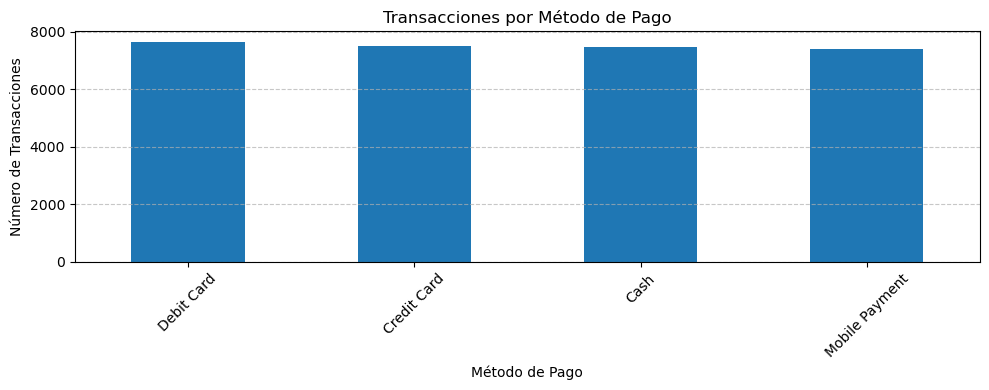

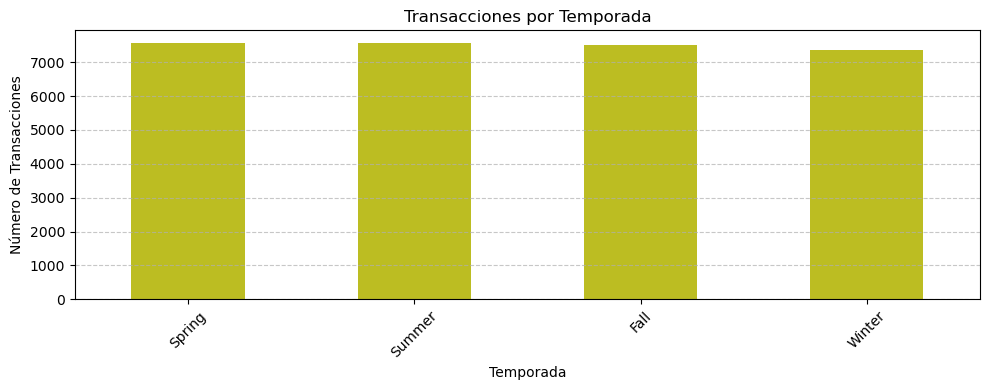

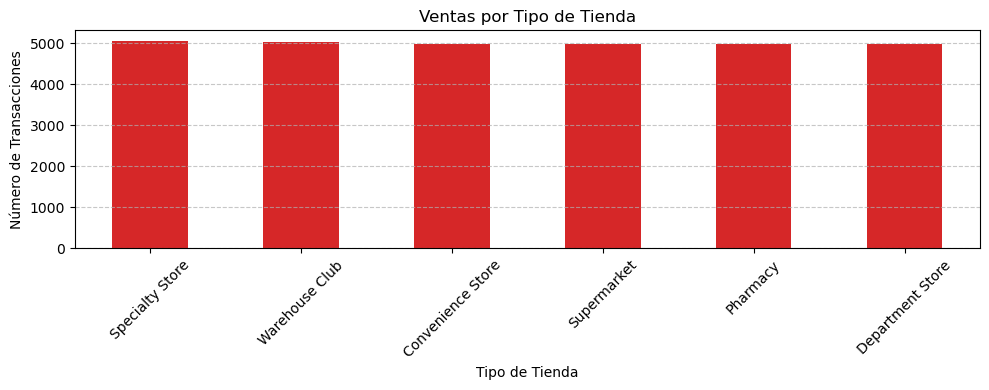

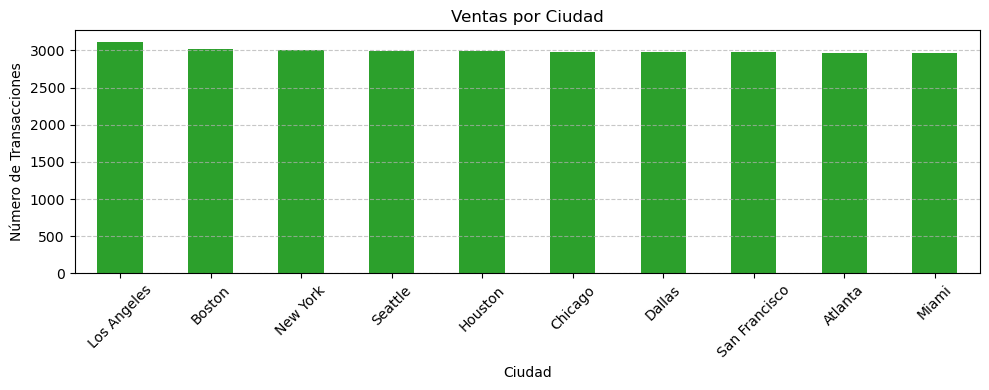

In [8]:

#--------------------------Histogramas de frecuencias relativas por categoría
#-----Por método de pago

#Cuenta cuantas transacciones ocurren cada método de pago
sales_by_payment_method = df['Payment_Method'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sales_by_payment_method.plot(kind='bar', color='tab:blue')
plt.title('Transacciones por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---Por temporada

# Contar el número de transacciones por temporada
sales_by_season = df['Season'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sales_by_season.plot(kind='bar', color='tab:olive')
plt.title('Transacciones por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#----- Por tipo de tienda

# Contar el número de transacciones por tipo de tienda
sales_by_store_type = df['Store_Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sales_by_store_type.plot(kind='bar', color='tab:red')
plt.title('Ventas por Tipo de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---- Por temporada
# Contar el número de transacciones por ciudad
sales_by_city = df['City'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sales_by_city.plot(kind='bar', color='tab:green')
plt.title('Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Prueba Chi cuadrada para demostrar la uniformidad de las variables.

La prueba chi-cuadrado es una prueba estadística que se utiliza para determinar si existe una asociación significativa entre dos variables categóricas.

En este contexto la prueba chi-cuadrado ayuda a determinar si las frecuencias observadas de los datos siguen una distribución uniforme.

Hipótesis

Hipótesis nula : las frecuencias observadas en los datos siguen una distribución uniforme.

Hipótesis alternativa : las frecuencias observadas en los datos no siguen una distribución uniforme.

In [9]:
observed = sales_by_season.values
expected = [len(df) / len(sales_by_season)] * len(sales_by_season)
chi2_stat, p_val, dof, expected = chi2_contingency([observed, expected])

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)


observed = sales_by_city.values
expected = [len(df) / len(sales_by_city)] * len(sales_by_city)
chi2_stat, p_val, dof, expected = chi2_contingency([observed, expected])

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)


observed = sales_by_store_type.values
expected = [len(df) / len(sales_by_store_type)] * len(sales_by_store_type)
chi2_stat, p_val, dof, expected = chi2_contingency([observed, expected])

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)


sales_by_payment_method
observed = sales_by_payment_method.values
expected = [len(df) / len(sales_by_payment_method)] * len(sales_by_payment_method)
chi2_stat, p_val, dof, expected = chi2_contingency([observed, expected])

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)

Chi-squared statistic: 1.6292038503586168
p-value: 0.6527863200657922
Chi-squared statistic: 2.8727827351799125
p-value: 0.9691256459310669
Chi-squared statistic: 0.6752933409600574
p-value: 0.9842970678239474
Chi-squared statistic: 2.0093327358624524
p-value: 0.5704719216414462


Con p-values superiores a 0.05, la significancia no nos da motivos para rechazar la hipótesis. Esto nos lleva a una conclusión: las observaciones parecen provenir de una distribución uniforme. En otras palabras, estas columnas carecen de datos intrigantes para su análisis.

## Análisis de los productos

Vamos hacer ciertas manipulaciones en los datos par así obtener un buen análisis de los productos vendidos por la compañía

In [10]:
# Pasamos de '[]' a [] es decir de string a lista para poder desagregar los productos
df['Product'] = df['Product'].apply(lambda x: ast.literal_eval(x))

# Primero, convierte la columna de productos en listas separadas
df = df.explode('Product')

# Convertir la columna 'Product' a tipo de datos 'category'
df['Product'] = df['Product'].astype('category')

# Ahora podemos realizar análisis en productos individuales
# Por ejemplo, contar cuántas veces se vendió cada producto
product_counts = df['Product'].value_counts()


# Visualiza los resultados
print(product_counts)  #Existen 81 productos diferentes en la base de datos

Product
Toothpaste                   2088
Sponges                      1172
Garden Hose                  1164
Butter                       1160
Onions                       1155
                             ... 
Orange                       1046
Iron                         1042
Canned Soup                  1031
Feminine Hygiene Products    1031
Vacuum Cleaner               1022
Name: count, Length: 81, dtype: int64


¡Finalmente se logro!, y podemos observar que durante estos 3 años la compañía vendió 81 productos distintos

De los cuáles la pasta de dientes fue el más presente en las transacciones de la compañía con 2088 apariciones, por lo que podemos decir que la mayoría de la gente visita esta cadena distribuidora de productos por la pasta de dientes.

A continuación se muestran los 5 productos más vendidos.

Product
Toothpaste     2088
Sponges        1172
Garden Hose    1164
Butter         1160
Onions         1155
Name: count, dtype: int64


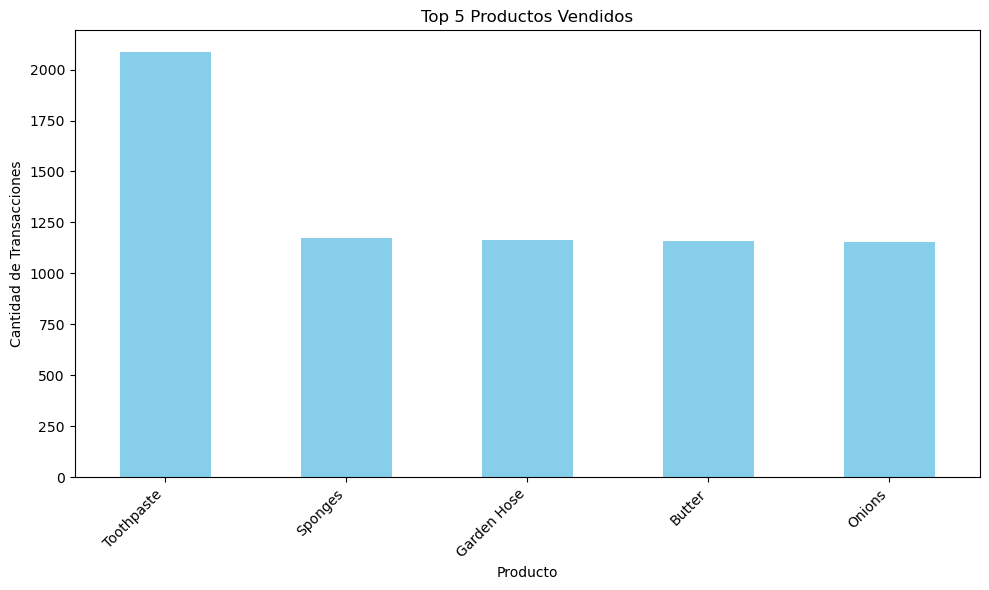

In [11]:
#Los 5 productos por lo que la gente visita esta cadena de super mercados

top_5 = product_counts[0:5] 
print(top_5)
#Pasta de dientes 2088
#Esponjas 1172
#Mangueras para el jardín 1160
#Manteca 1160
#Cebollas 1155

#Gráfica con los 5 productos más vendidos por transacción (no por unidad)
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Productos Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

¿Podemos preguntarnos que producto fue más vendido por temporada?

La respuesta es sí, a continuación se muestra el producto más vendido por temporada

In [12]:
#----------- Encontrar el producto más vendido por estación

product_season_counts = df.groupby(['Product', 'Season']).size().reset_index(name='Transaction_Count')
    
top_products_by_season = product_season_counts.loc[product_season_counts.groupby('Season')['Transaction_Count'].idxmax()]
print(top_products_by_season)

        Product  Season  Transaction_Count
292  Toothpaste    Fall                502
293  Toothpaste  Spring                519
294  Toothpaste  Summer                568
295  Toothpaste  Winter                499


Podemos observar que la pasta de dientes fue el prducto más vendido en cada estación del año.

## Serie de tiempo de la pasta de dientes

Como vemos la pasta de dientes es el producto más importante para el análisis, por lo que a continuación se presenta una serie de tiempo de la pasta de dientes

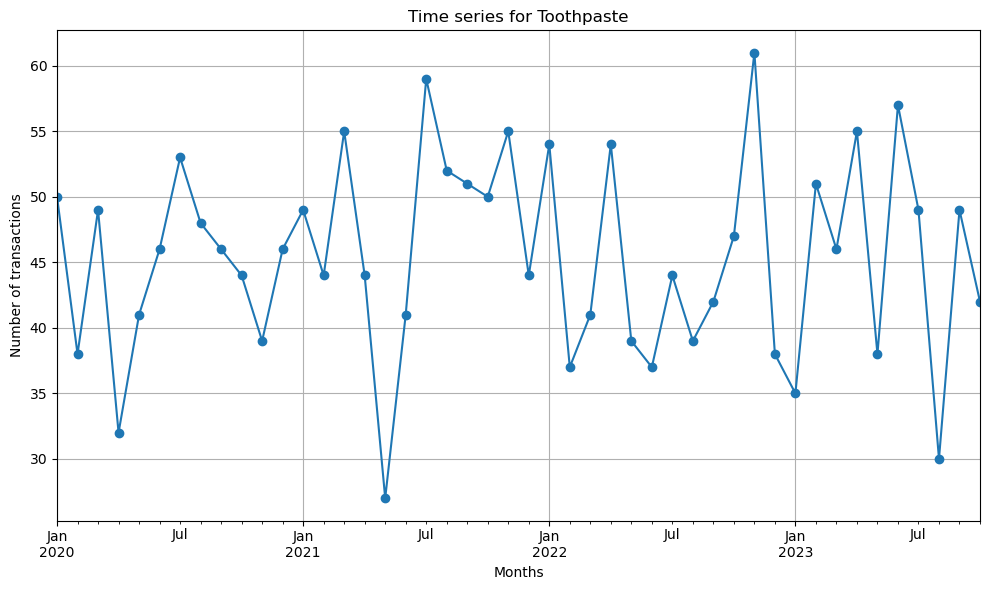

In [13]:
#-----------Serie de tiempo de la pasta de dientes

# Agregar una columna de unos llamada 'Ones'
df_with_ones = df.assign(Ones=1)

df_with_ones['Date'] = pd.to_datetime(df_with_ones['Date'])


# Agregar una columna 'Month' que contenga el mes de cada fecha
df_with_ones['Month'] = df_with_ones['Date'].dt.to_period('M')

# Filtrar el DataFrame solo para el producto 'Toothpaste'
toothpaste_data = df_with_ones[df_with_ones['Product'] == 'Toothpaste']

# Agrupar por mes y sumar los Total_Items
monthly_time_series_data = toothpaste_data.groupby('Month')['Ones'].sum()

# Serie de tiempo de la pasta de dientes
plt.figure(figsize=(10, 6))
monthly_time_series_data.plot(marker='o', linestyle='-')
plt.title('Time series for Toothpaste')
plt.xlabel('Months')
plt.ylabel('Number of transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

De marzo a mayo de 2021 hubo una caída en las compras del pasta de dientes paso de 55 transacciones en marzo a menos de 30 para el mes de mayo, Sin embargo no se observa un factor de estacionaridad o algún comportamiento lineal en el tiempo.

# 4. Análisis de segmentos o conglomerados

Cargamos las librerías necesarias para llevar a cabo este análisis

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('customer_segmentation.csv')

Estamos bajo un análisis no supervisado el proceso de aprendizaje se concentra en encontrar, de ser posible, patrones que sean de interés para una aplicación en particular. El desempeño de este proceso de aprendizaje muchas veces se mide considerando la interpretabilidad de los resultados.


Los resultados obtenidos (dimensiones o grupos) si son interesantes podrían ser usados, posteriormente, en técnicas de aprendizaje supervisado, por ejemplo, tomando el papel de Y o, en el caso de las dimensiones,
como nuevas covariables.


Me centrare en mostrar análisis donde se usarán los métodos de k-means.


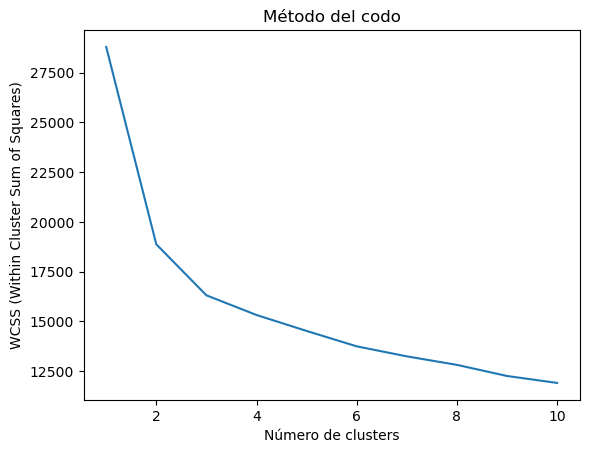

In [17]:
df.dropna(inplace=True)

# Seleccionar características relevantes para el análisis de segmentación
features = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Determinar el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

En la gráfica del método del codo, el eje x representa el número de clusters y el eje y representa el WCSS. 
El punto en el que la disminución en WCSS comienza a desacelerarse es donde deberías seleccionar el número óptimo de clusters.
Elgimos el punto donde la disminución en WCSS comience a nivelarse. Este punto  es el codo en la gráfica. 


Observamos y es en el punto 3 donde se empieza nivelar la gráfica

In [18]:
# Entrenar el modelo de KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=10)
kmeans.fit(scaled_features)

# Agregar los resultados de la segmentación al conjunto de datos
df['Cluster'] = kmeans.labels_

# Analizar los centroides de los clusters para entender los perfiles de los segmentos
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(cluster_centers, columns=features.columns)
print(centroides_df)

         Income    Recency    MntWines  MntFruits  MntMeatProducts  \
0  76644.394693  49.305141  593.094527  68.892206       445.376451   
1  34915.882812  49.124023   41.161133   4.781250        21.941406   
2  57400.232993  48.503401  468.814626  20.202381       133.481293   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0       100.185738         70.852405     78.834163           1.402985   
1         7.085937          5.037109     14.805664           1.980469   
2        26.471088         20.282313     58.913265           3.863946   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0         5.281924             5.978441           8.464345           2.854063  
1         2.067383             0.544922           3.208008           6.411133  
2         6.365646             2.969388           7.588435           5.942177  


## Cluster 1:

Income: 76,644.39

Recency: 49.31 días desde la última interacción

MntWines: 593.09 gastados en vinos

MntFruits: 68.89 gastados en frutas

MntMeatProducts: 445.38 gastados en productos de carne

MntFishProducts: 100.19 gastados en productos de pescado

MntSweetProducts: 70.85 gastados en productos dulces

MntGoldProds: 78.83 gastados en productos de oro

NumDealsPurchases: 1.40 compras realizadas con descuento

NumWebPurchases: 5.28 compras realizadas a través de la web

NumCatalogPurchases: 5.98 compras realizadas a través de catálogos

NumStorePurchases: 8.46 compras realizadas en tiendas físicas

NumWebVisitsMonth: 2.85 visitas al sitio web por mes

## Cluster 2:

Income: 34,915.88

Recency: 49.12 días desde la última interacción

MntWines: 41.16 gastados en vinos

MntFruits: 4.78 gastados en frutas

MntMeatProducts: 21.94 gastados en productos de carne

MntFishProducts: 7.09 gastados en productos de pescado

MntSweetProducts: 5.04 gastados en productos dulces

MntGoldProds: 14.81 gastados en productos de oro

NumDealsPurchases: 1.98 compras realizadas con descuento

NumWebPurchases: 2.07 compras realizadas a través de la web

NumCatalogPurchases: 0.54 compras realizadas a través de catálogos

NumStorePurchases: 3.21 compras realizadas en tiendas físicas

NumWebVisitsMonth: 6.41 visitas al sitio web por mes

## Cluster 3:

Income: 57,400.23

Recency: 48.50 días desde la última interacción

MntWines: 468.81 gastados en vinos

MntFruits: 20.20 gastados en frutas

MntMeatProducts: 133.48 gastados en productos de carne

MntFishProducts: 26.47 gastados en productos de pescado

MntSweetProducts: 20.28 gastados en productos dulces

MntGoldProds: 58.91 gastados en productos de oro

NumDealsPurchases: 3.86 compras realizadas con descuento

NumWebPurchases: 6.37 compras realizadas a través de la web

NumCatalogPurchases: 2.97 compras realizadas a través de catálogos

NumStorePurchases: 7.59 compras realizadas en tiendas físicas

NumWebVisitsMonth: 5.94 visitas al sitio web por mes

## Interpretación

Los clusters se categorizan por cantidad de egreso. 

El cluster 1 que son las personas con mayores ingreso, 
El cluster 2 que son las personas con menos ingreso
y el cluster 3 que nos da una idea de las personas con ingresos medios


1. Las personas que más visitan la web son las de menores ingresos
2. Las personas en general dejan de interactuar por un tiempo de mes y 19 días aproximadamente que puede ser interpretado como el tiempo en el cual los suministros comprados se terminan
3. Las personas en general gastan más en vinos y en carne
4. A pesar de que las personas de menores ingresos son las que más entran al sitio web son las que menos realizan compras en el sitio
5. A pesar de que el sector con mayores ingresos realiza más compras es el que menos busca descuentos lo cual es consistente con la lógica social

Cluster
0     603
1    1025
2     587
Name: count, dtype: int64


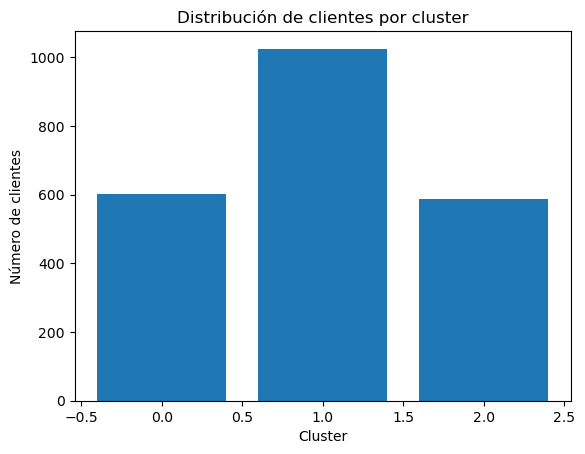

In [19]:
# Analizar la distribución de los clientes en cada cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualizar la distribución de los clientes en cada cluster
plt.bar(cluster_counts.index, cluster_counts.values)
plt.title('Distribución de clientes por cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.show()

Podemos encontrar cuantos cliente pertenecen a cada clase

El conglomerado o 

Cluster 1  603

Cluster 2 1025 

Cluster 3 587 



## Conclusión

### Por lo que la mayoría de clientes pertenece al de menores ingresos, una buena estrategia de marketing sería hacer que sea más efectivo el sitio web fácilitando las compras, ya que ingresan mucho pero no queda reflejado en compras 